In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv
import pandas as pd
import math
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn import datasets  
from sklearn.decomposition import PCA 
import seaborn as sns  
import matplotlib.pyplot as plt

In [26]:
DF=pd.read_csv('/content/drive/MyDrive/DM P1/Weed-4class-36/Weed-4class-36-labels.csv')
DF

Filename  Label     Species
0      20161207-112417-0.jpg      8    Negative
1      20161207-112431-0.jpg      8    Negative
2      20161207-112802-0.jpg      8    Negative
3      20161207-112812-0.jpg      8    Negative
4      20170128-101909-0.jpg      8    Negative
...                      ...    ...         ...
13277  20171025-172145-3.jpg      3  Parthenium
13278  20171025-172200-3.jpg      3  Parthenium
13279  20171025-172226-3.jpg      3  Parthenium
13280  20171025-172236-3.jpg      3  Parthenium
13281  20171025-172247-3.jpg      3  Parthenium

[13282 rows x 3 columns]

2. Use OpenCV to perform image processing and feature extraction
(Reference: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html)
(a) Histogram Equalization (Image Intensity Normalization)

i. Choose 5 images from any one of the 4 weed classes and 5 images from the negative dataset.


In [27]:
DF_weed=DF.loc[DF['Species']=='Parthenium']
DF_ngt=DF.loc[DF['Species']=='Negative']
weed_imgs=list(DF_weed['Filename'][0:5])
ngt_imgs=list(DF_ngt['Filename'][0:5])
print(ngt_imgs)
print(weed_imgs)

['20161207-112417-0.jpg', '20161207-112431-0.jpg', '20161207-112802-0.jpg', '20161207-112812-0.jpg', '20170128-101909-0.jpg']
['20170906-091113-4.jpg', '20170906-091548-1.jpg', '20170906-091615-1.jpg', '20170906-091701-1.jpg', '20170906-091715-2.jpg']


ii. Convert the color images to grayscale images (MUST use iteration; No points given if no
iteration is used) (0.5 point)


Gray scale image of negative weed image 1


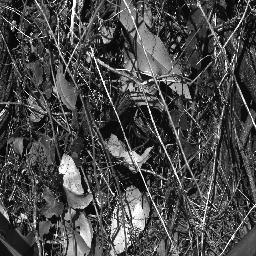

Gray scale image of negative weed image 2


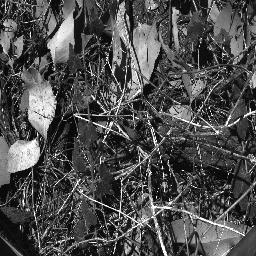

Gray scale image of negative weed image 3


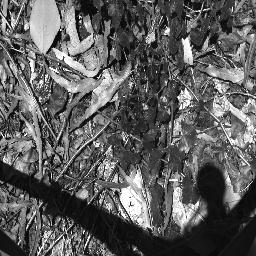

Gray scale image of negative weed image 4


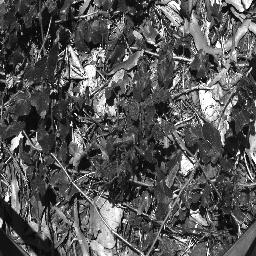

Gray scale image of negative weed image 5


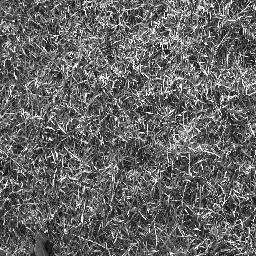

Gray scale image of weed image 1


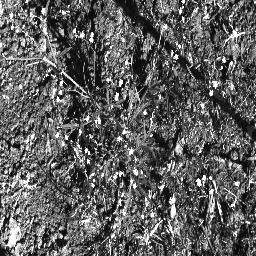

Gray scale image of weed image 2


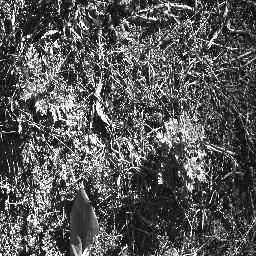

Gray scale image of weed image 3


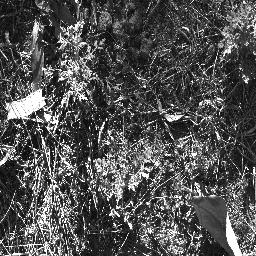

Gray scale image of weed image 4


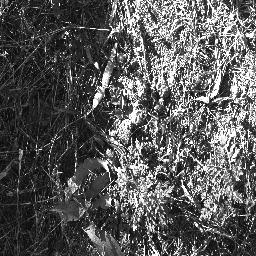

Gray scale image of weed image 5


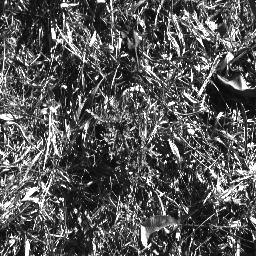

In [28]:
ngt_grayimg=[]
wd_grayimg=[]

i=1
for img in ngt_imgs:
  img_gray = cv2.imread('/content/drive/MyDrive/DM P1/Negatives/'+img,0)
  print("Gray scale image of negative weed image "+str(i))
  cv2_imshow(img_gray)
  ngt_grayimg.append(img_gray)
  i+=1

i=1
for img in weed_imgs:
  img_gray = cv2.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+img,0)
  print("Gray scale image of weed image "+str(i))
  cv2_imshow(img_gray)
  wd_grayimg.append(img_gray)
  i+=1

iii. Plot the 10 grayscale images with their corresponding pixel intensity histograms. (0.5 point)

negative grayscale image1


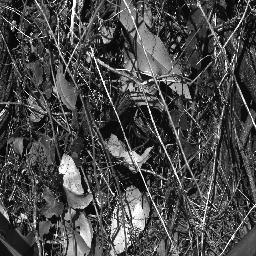

Histogram for image 1 in negative weed image dataset


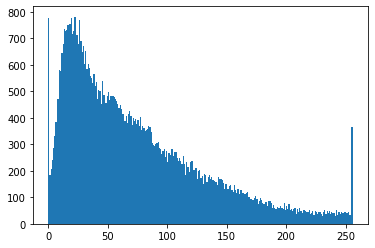

negative grayscale image2


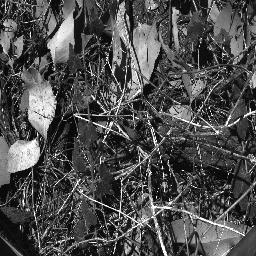

Histogram for image 2 in negative weed image dataset


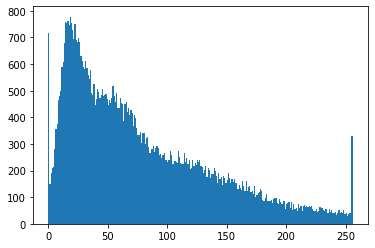

negative grayscale image3


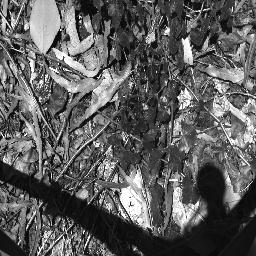

Histogram for image 3 in negative weed image dataset


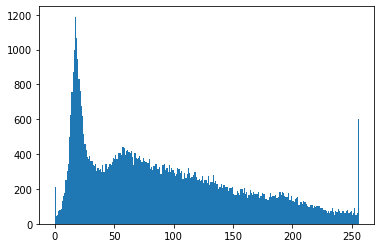

negative grayscale image4


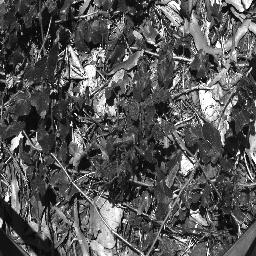

Histogram for image 4 in negative weed image dataset


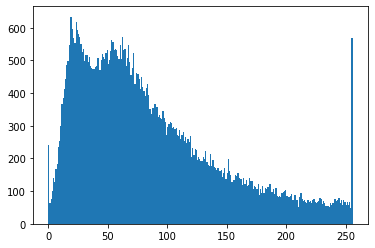

negative grayscale image5


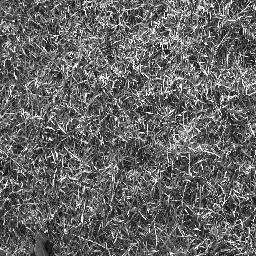

Histogram for image 5 in negative weed image dataset


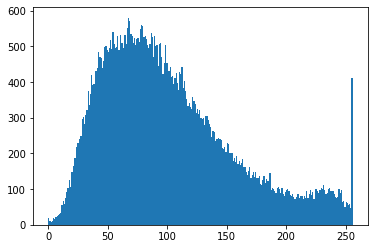

weed grayscale image1


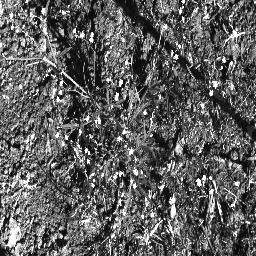

Histogram for image 1 in weed image dataset


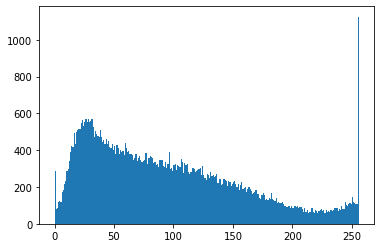

weed grayscale image2


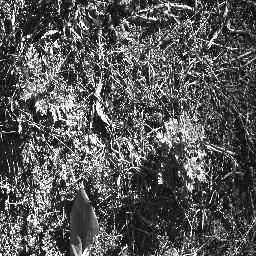

Histogram for image 2 in weed image dataset


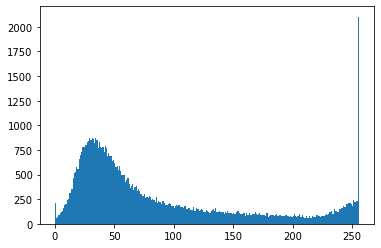

weed grayscale image3


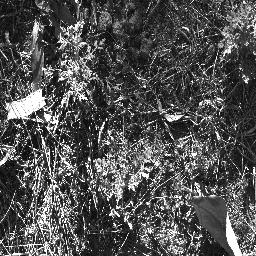

Histogram for image 3 in weed image dataset


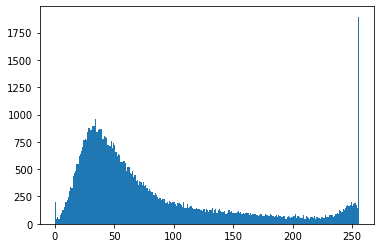

weed grayscale image4


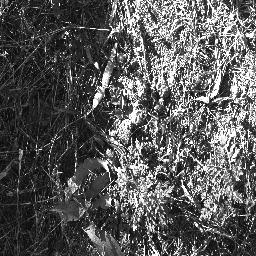

Histogram for image 4 in weed image dataset


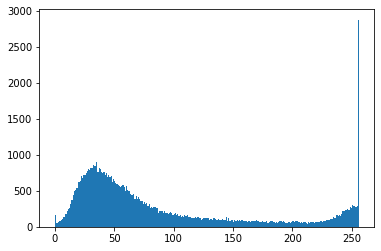

weed grayscale image5


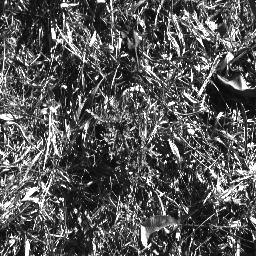

Histogram for image 5 in weed image dataset


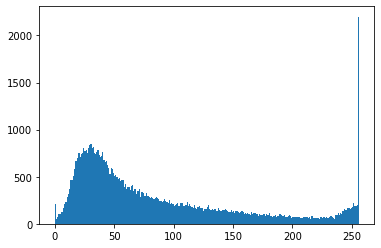

In [29]:
i=1
for img in ngt_grayimg:
  print("negative grayscale image" +str(i))
  cv2_imshow(img)
  print('Histogram for image '+str(i)+' in negative weed image dataset')
  plt.hist(img.ravel(),256,[0,256]); plt.show()
  i+=1

i=1
for img in wd_grayimg:
  print("weed grayscale image" +str(i))
  cv2_imshow(img)
  print('Histogram for image '+str(i)+' in weed image dataset')
  plt.hist(img.ravel(),256,[0,256]); plt.show()
  i+=1

Reference : https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html

iv. Perform histogram equalization on the 10 images. Plot the NEW intensity equalized grayscale
images and their corresponding equalized pixel intensity histograms. (1.5 point)

Equalized grayscale image 1 in the negative weed set


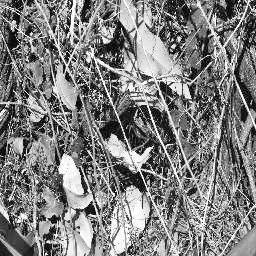

Equalized histogram for image 1 in negative weed image dataset


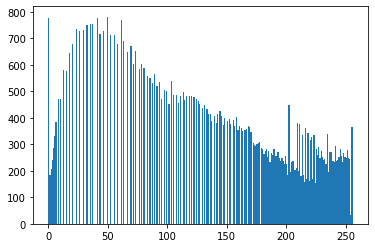

Equalized grayscale image 2 in the negative weed set


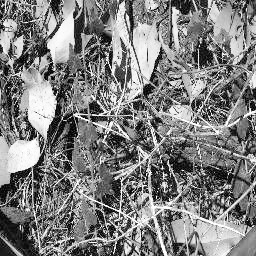

Equalized histogram for image 2 in negative weed image dataset


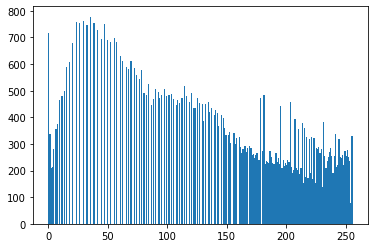

Equalized grayscale image 3 in the negative weed set


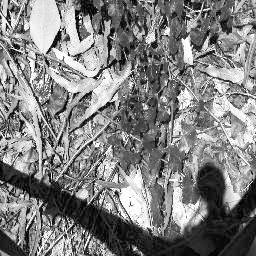

Equalized histogram for image 3 in negative weed image dataset


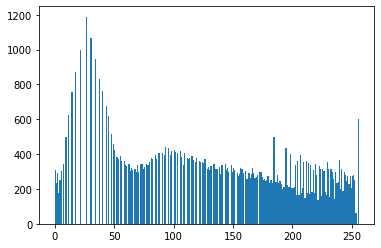

Equalized grayscale image 4 in the negative weed set


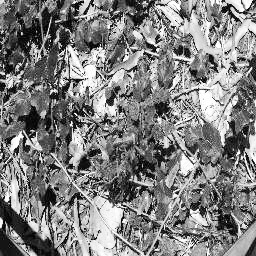

Equalized histogram for image 4 in negative weed image dataset


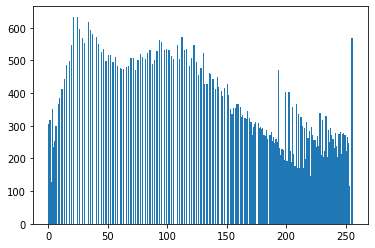

Equalized grayscale image 5 in the negative weed set


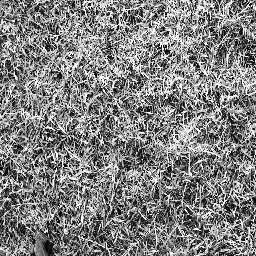

Equalized histogram for image 5 in negative weed image dataset


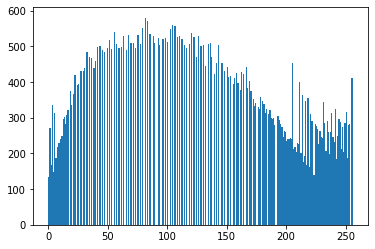

Equalized grayscale image 1 in the weed set


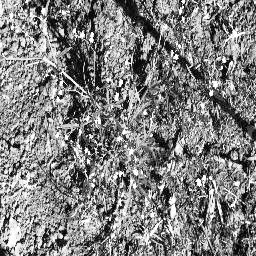

Equalized histogram for image 1 in negative weed image dataset


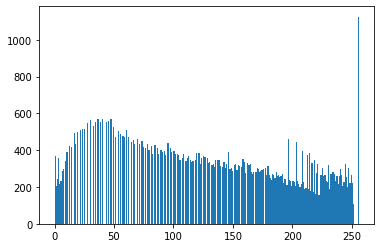

Equalized grayscale image 2 in the weed set


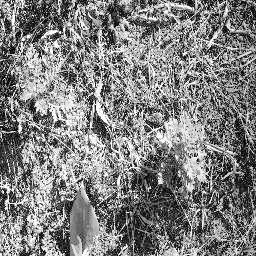

Equalized histogram for image 2 in negative weed image dataset


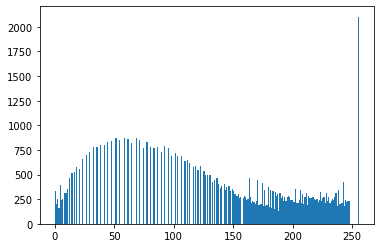

Equalized grayscale image 3 in the weed set


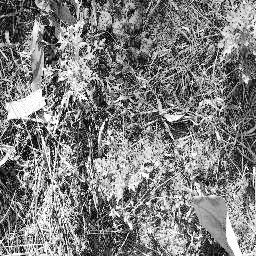

Equalized histogram for image 3 in negative weed image dataset


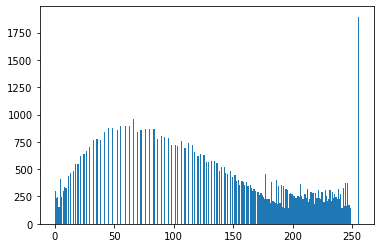

Equalized grayscale image 4 in the weed set


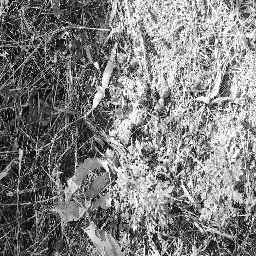

Equalized histogram for image 4 in negative weed image dataset


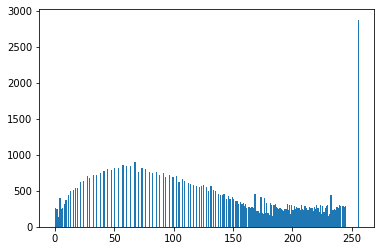

Equalized grayscale image 5 in the weed set


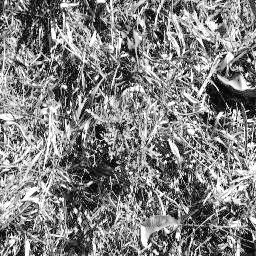

Equalized histogram for image 5 in negative weed image dataset


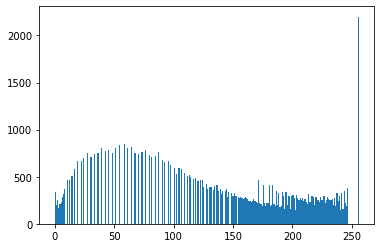

In [30]:
ngt_eqzd_grayimg=[]
wd_eqzd_grayimg=[]

for image in ngt_imgs:
  img = cv2.imread('/content/drive/MyDrive/DM P1/Negatives/'+image,0)
  equ = cv2.equalizeHist(img)
  ngt_eqzd_grayimg.append(equ)

for image in weed_imgs:
  img = cv2.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+image,0)
  equ = cv2.equalizeHist(img)
  wd_eqzd_grayimg.append(equ)

i=1
for img in ngt_eqzd_grayimg:
  print('Equalized grayscale image ' +str(i)+' in the negative weed set')
  cv2_imshow(img)
  print('Equalized histogram for image '+str(i)+' in negative weed image dataset')
  plt.hist(img.ravel(),256,[0,256]); plt.show()
  i+=1

i=1
for img in wd_eqzd_grayimg:
  print('Equalized grayscale image ' +str(i)+' in the weed set')
  cv2_imshow(img)
  print('Equalized histogram for image '+str(i)+' in negative weed image dataset')
  plt.hist(img.ravel(),256,[0,256]); plt.show()
  i+=1

v. Pick a grayscale image and its corresponding equalized image. Plot the 2 images next to each
other. What did you observe? (0.5 point)

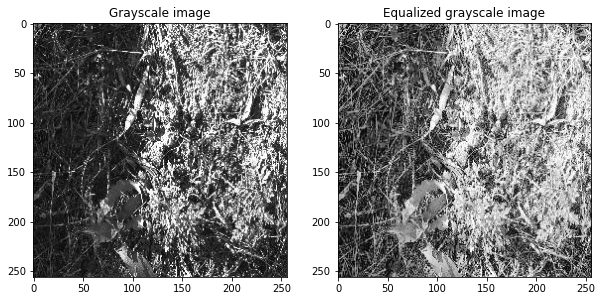

In [31]:
for image in weed_imgs[3:4]:
  img = cv2.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+image,0)
  equ = cv2.equalizeHist(img)
  plt.figure(figsize=(10,10))
  plt.subplot(121)
  plt.title('Grayscale image')
  plt.imshow(img, cmap='gray')
  plt.subplot(122)
  plt.title('Equalized grayscale image')
  plt.imshow(equ, cmap='gray')

Before the equalization, the image is dark
whereas, after the equalization, the contrast of  the image is increased.

(b) RGB histogram

i. Choose 5 images from your dataset (one from each class - 4 weed classes and 1 negative class and different from Question 2)

In [32]:
DF_Part=DF.loc[DF['Species']=='Parthenium']
part_weed=list(DF_Part['Filename'][0:1])

DF_Lant=DF.loc[DF['Species']=='Lantana']
lant_weed=list(DF_Lant['Filename'][0:1])

DF_Snake=DF.loc[DF['Species']=='Snake weed']
snk_weed=list(DF_Snake['Filename'][0:1])

DF_Siam=DF.loc[DF['Species']=='Siam weed']
siam_weed=list(DF_Siam['Filename'][0:1])

DF_ngt
ngt_imgs=list(DF_ngt['Filename'][5:6])

ii. Plot the images with their corresponding RGB histogram values (The three curves MUST be in one figure - see Figure 1, add x-axis label “Intensity” and y-axis label “Pixel Count” ). (1 point)

Negative image


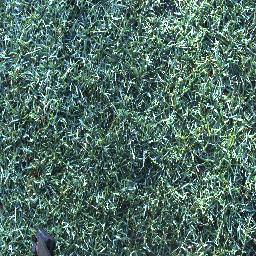

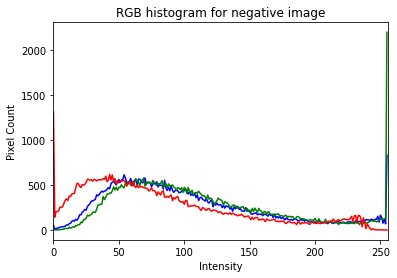

Parthenium image


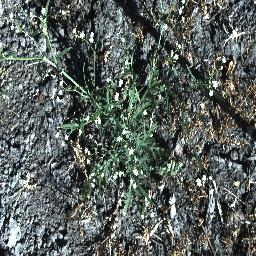

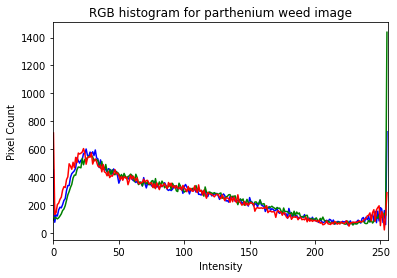

Lantana image


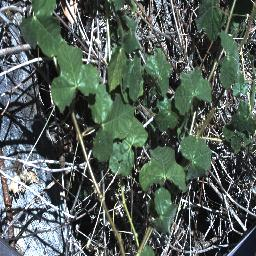

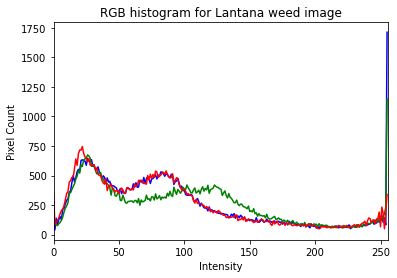

Snake weed image


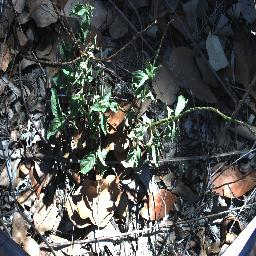

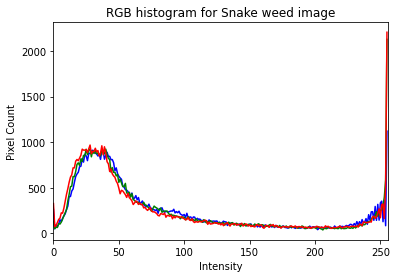

Siam weed image


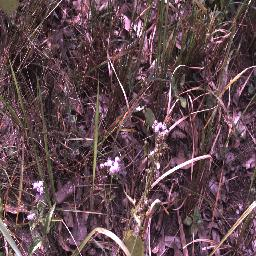

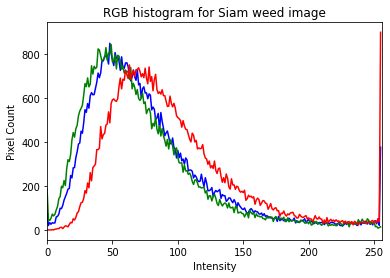

In [33]:
for img in ngt_imgs:
  img_neg = cv.imread('/content/drive/MyDrive/DM P1/Negatives/'+img)
print('Negative image')
cv2_imshow(img_neg)
color = ('b','g','r')
for i,col in enumerate(color):
    histclr = cv.calcHist([img_neg],[i],None,[256],[0,256])
    plt.plot(histclr,color = col)
    plt.title('RGB histogram for negative image')
    plt.xlim([0,256])
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')
plt.show()

for img in part_weed:
  img_parth = cv.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+img)
print('Parthenium image')
cv2_imshow(img_parth)
color = ('b','g','r')
for i,col in enumerate(color):
    histclr = cv.calcHist([img_parth],[i],None,[256],[0,256])
    plt.plot(histclr,color = col)
    plt.title('RGB histogram for parthenium weed image')
    plt.xlim([0,256])
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')
plt.show()

for img in lant_weed:
  img_lant = cv.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+img)
print('Lantana image')
cv2_imshow(img_lant)
color = ('b','g','r')
for i,col in enumerate(color):
    histclr = cv.calcHist([img_lant],[i],None,[256],[0,256])
    plt.plot(histclr,color = col)
    plt.title('RGB histogram for Lantana weed image')
    plt.xlim([0,256])
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')
plt.show()

for img in snk_weed:
  img_snake = cv.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+img)
print('Snake weed image')
cv2_imshow(img_snake)
color = ('b','g','r')
for i,col in enumerate(color):
    histclr = cv.calcHist([img_snake],[i],None,[256],[0,256])
    plt.plot(histclr,color = col)
    plt.title('RGB histogram for Snake weed image')
    plt.xlim([0,256])
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')
plt.show()

for img in siam_weed:
  img_siam = cv.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+img)
print('Siam weed image')
cv2_imshow(img_siam)
color = ('b','g','r')
for i,col in enumerate(color):
    histclr = cv.calcHist([img_siam],[i],None,[256],[0,256])
    plt.plot(histclr,color = col)
    plt.title('RGB histogram for Siam weed image')
    plt.xlim([0,256])
    plt.xlabel('Intensity')
    plt.ylabel('Pixel Count')
plt.show()

(c) Histogram Comparison (Measures of Similarity and Dissimilarity) 

i. Pick 2 images from the same class and 1 image from another class.

In [34]:
DF_Part=DF.loc[DF['Species']=='Parthenium']
part_weed=list(DF_Part['Filename'][0:1])
print(part_weed)

DF_Lant=DF.loc[DF['Species']=='Lantana']
lant_weed=list(DF_Lant['Filename'][0:2])
print(lant_weed)

['20170906-091113-4.jpg']
['20161207-112141-0.jpg', '20161207-142354-0.jpg']


ii. Convert the three images to grayscale pixel intensity histograms. (These will be the vector
representations of the images)

Gray scale pixel intensity histogram for Lantana weed 1


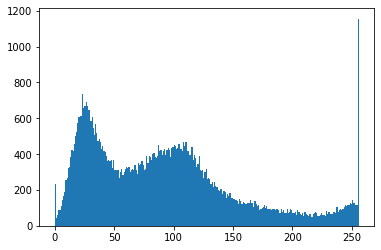

Gray scale pixel intensity histogram for Lantana weed 2


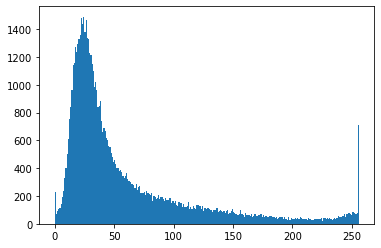

Gray scale pixel intensity histogram for Parthenium weed 1


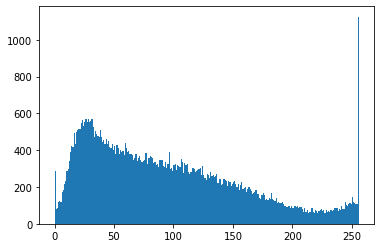

In [35]:
i=1
for image in lant_weed:
  img = cv2.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+image,0)
  print("Gray scale pixel intensity histogram for Lantana weed "+str(i))
  plt.hist(img.ravel(),256,[0,256]); plt.show()
  i+=1

for image in part_weed:
  img = cv2.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+image,0)
  print("Gray scale pixel intensity histogram for Parthenium weed 1")
  plt.hist(img.ravel(),256,[0,256]); plt.show()

iii. Perform histogram comparison using the following metrics/measures.

•Euclidean Distance

•Manhattan Distance

•Bhattacharyya distance

•Histogram Intersection

For this task, you will compare histograms by computing the metrics/measures of (1) the 2
images from the same class, AND (2) 2 images from different classes. (2 points) (Note: You
can also use other packages.)

In [36]:
print(lant_weed)
print(part_weed)

['20161207-112141-0.jpg', '20161207-142354-0.jpg']
['20170906-091113-4.jpg']


In [37]:
src_base = cv.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+lant_weed[0])
src_test_same = cv.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+lant_weed[1])
src_test_dif = cv.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+part_weed[0])

hsv_base = cv.cvtColor(src_base, cv.COLOR_BGR2HSV)
hsv_test_same = cv.cvtColor(src_test_same, cv.COLOR_BGR2HSV)
hsv_test_dif = cv.cvtColor(src_test_dif, cv.COLOR_BGR2HSV)

channels= [0, 1]
histSize= [50,50]
h_ranges = [0, 180]
s_ranges = [0, 256]
ranges = h_ranges + s_ranges

hist_base = cv.calcHist([hsv_base], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

hist_test_same = cv.calcHist([hsv_test_same], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_test_same, hist_test_same, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

hist_test_dif = cv.calcHist([hsv_test_dif], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_test_dif, hist_test_dif, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

array([[0.61260426, 0.00092678, 0.00463392, ..., 0.        , 0.        ,
        0.03707136],
       [0.00092678, 0.01575533, 0.02224282, ..., 0.        , 0.        ,
        0.00648749],
       [0.        , 0.        , 0.00092678, ..., 0.        , 0.        ,
        0.00463392],
       ...,
       [0.        , 0.00092678, 0.00370714, ..., 0.        , 0.        ,
        0.        ],
       [0.01204819, 0.02131603, 0.00834106, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00092678, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [38]:
def Euclidean(H1,H2):
    distance =0
    for i in range(len(H1)):
        distance += np.linalg.norm((H1[i]-H2[i]))**2
    return np.sqrt(distance)

def Manhattan(H1,H2):
    distance =0
    for i in range(len(H1)):
        distance += abs(H1[i]-H2[i])       
    return sum(distance)

Bhattacharya=cv2.HISTCMP_BHATTACHARYYA
Intersect=cv2.HISTCMP_INTERSECT

Euclidean_distance_same = Euclidean(hist_base, hist_test_same)
print(f'Euclidean distance between same class images {Euclidean_distance_same}')
Euclidean_distance_dif = Euclidean(hist_base, hist_test_dif)
print(f'Euclidean distance between different class images {Euclidean_distance_dif}')

Manhattan_distance_same = Manhattan(hist_base, hist_test_same)
print(f'Manhattan distance between same class images {Manhattan_distance_same}')
Manhattan_distance_dif = Manhattan(hist_base, hist_test_dif)
print(f'Manhattan distance between different class images {Manhattan_distance_dif}')

Bhattacharya_distance_same = cv.compareHist(hist_base, hist_test_same, Bhattacharya)
print(f'Bhattacharya distance between same class images {Bhattacharya_distance_same}')
Bhattacharya_distance_dif = cv.compareHist(hist_base, hist_test_dif, Bhattacharya)
print(f'Bhattacharya distance between different class images {Bhattacharya_distance_dif}')

Intersect_distance_same = cv.compareHist(hist_base, hist_test_same, Intersect)
print(f'Intersect distance between same class images {Intersect_distance_same}')
Intersect_distance_dif = cv.compareHist(hist_base, hist_test_dif, Intersect)
print(f'Intersect distance between different class images {Intersect_distance_dif}')

Euclidean distance between same class images 2.3148891115261243
Euclidean distance between different class images 3.1602228211920975
Manhattan distance between same class images 37.14959311715211
Manhattan distance between different class images 50.673010686878115
Bhattacharya distance between same class images 0.38394959848104676
Bhattacharya distance between different class images 0.39424386133129513
Intersect distance between same class images 13.161342954001157
Intersect distance between different class images 29.744271722214762


Reference:
https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/

https://docs.opencv.org/3.2.0/d6/dc7/group__imgproc__hist.html#gga994f53817d621e2e4228fc646342d386ad75f6e8385d2e29479cf61ba87b57450

(d) Image Feature Descriptor: ORB (Oriented FAST and Rotated BRIEF) 

i. Pick a random image and perform keypoint extraction using ORB feature descriptor.


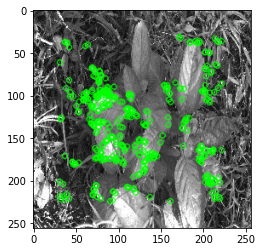

(<matplotlib.image.AxesImage at 0x7f0f15027700>, None)

In [39]:
img = cv.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/20170404-153924-0.jpg', cv.IMREAD_GRAYSCALE)

orb = cv.ORB_create()
kp = orb.detect(img,None)
kp, des = orb.compute(img, kp)
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

ii. Try using three different edge threshold values (This is size of the border where the features
are not detected. It should roughly match the patchSize parameter). Use patchSize 𝑋= (2 ×
last 2 digits of your BannerID) OR Floor((last 2 digits of your BannerID)/2) OR last 2 digits
of your BannerID (whichever works best for your image)
orb = cv.ORB_create(edgeThreshold=edge_threshold,
patchSize=X, nlevels=8, fastThreshold=20,
scaleFactor=1.2, WTA_K=2,scoreType=cv.ORB_HARRIS_SCORE,
firstLevel=0, nfeatures=30)
 
 find the keypoints with ORB
kp = orb.detect(img,None)
 
 draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0))
What is your Banner ID? What are the number of keypoints you extracted for the 3 edge
threshold values? (1 point)

iii.Plot the keypoints for the 3 edge threshold values on the image on three different figures. (see
Fig 2 for one such figure) (1 point)

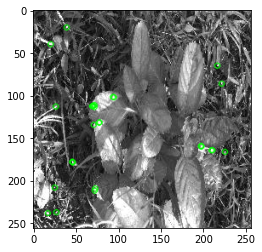

number of key points 30


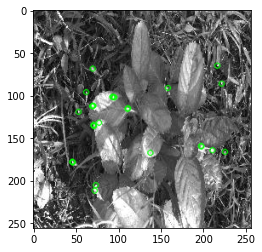

number of key points 30


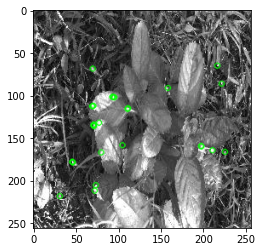

number of key points 30


In [40]:
img = cv.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/20170404-153924-0.jpg', cv.IMREAD_GRAYSCALE)

edge_threshold=[15,28,30]
X=28

for edg_thrshold in edge_threshold:
  orb = cv.ORB_create(edgeThreshold=edg_thrshold, patchSize=X, nlevels=8, fastThreshold=20, 
                    scaleFactor=1.2, WTA_K=2,scoreType=cv.ORB_HARRIS_SCORE, firstLevel=0, nfeatures=30)
  kp = orb.detect(img,None)
  no_kp =len(kp)
  img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0))
  plt.imshow(img2), plt.show()
  print(f'number of key points {no_kp}')

My  banner  ID is 916426214

Key points that I extracted for the three Threshold values were : 30 each

(e) Dimensionality reduction (using Principal Component Analysis, PCA) (see https://scikit-learn.
org/stable/modules/generated/sklearn.decomposition.PCA.html for PCA. https://
scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.htmlfor code
example. We will use scikit learn more extensively in the next assignment)

i. Use images from one weed class and the negative dataset.

In [55]:
DF_weed.head()
DF_weed_imgs=list(DF_weed['Filename'])
DF_ngt_imgs=list(DF_ngt['Filename'])

ii. Convert all the images to grayscale pixel intensity histograms.

iii. Perform Principal Component Analysis (PCA) dimensionality reduction on the set of histograms to 2 dimensions. (1 point) (Note: You should not use the class labels)

In [53]:
arr=np.array([])

X=[]
Y=[]

for (image_weed,image_ngt) in zip(DF_weed_imgs, DF_ngt_imgs):
  img_weed = cv2.imread('/content/drive/MyDrive/DM P1/Weed-4class-36/'+image_weed,0)
  hist_weed = cv2.calcHist(img_weed, [0], None, [256], [0,256])
  arr_weed=np.append(arr, hist_weed)

  img_ngt = cv2.imread('/content/drive/MyDrive/DM P1/Negatives/'+image_ngt,0)
  hist_ngt = cv2.calcHist(img_ngt, [0], None, [256], [0,256])
  arr_ngt=np.append(arr, hist_ngt)

  arr_fnl=np.stack((arr_weed,arr_ngt), axis=1)

  pca = decomposition.PCA(n_components=2)
  pca.fit_transform(arr_fnl)

  X.append(pca.singular_values_[0])
  Y.append(pca.singular_values_[1])

Reference: https://www.etutorialspoint.com/index.php/309-python-opencv-histograms-of-grayscale-image

https://www.geeksforgeeks.org/reduce-data-dimentionality-using-pca-python/

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

iv. Plot the 2D points using 2 different colors for data from the 2 classes (see Figure 3). Are the
data from the two classes separable? (1 point)

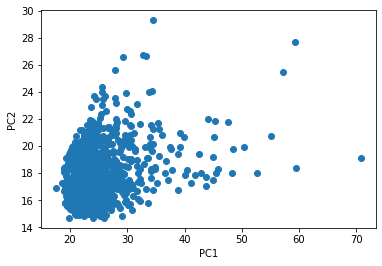

In [54]:
plt.scatter(X,Y)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

The points from the two classes are  not separable, may be the two classes are difficult  to be separable based on the histograms.